In [3]:
import numpy as np
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 1000000)
pd.set_option('display.max_rows', 1000000)




In [4]:
data = pd.read_table('Fsatellites.tsv', encoding = "ISO-8859-1")
print(data.shape)

for col in data.columns:
    if 'Unnamed' in col:
        del data[col]
        
for col in data.columns:
    if 'Source' in col:
        del data[col]

#data = data.fillna(data.min())
#pd.unique()
#data['Expected Lifetime']

(1381, 254)


In [5]:
data.columns.values

array(['Name of Satellite, Alternate Names', 'Country/Org of UN Registry',
       'Country of Operator/Owner', 'Operator/Owner', 'Users', 'Purpose',
       'Detailed Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', 'Dry Mass (kg.)', 'Power (watts)',
       'Date of Launch', 'Expected Lifetime', 'Contractor',
       'Country of Contractor', 'Launch Site', 'Launch Vehicle',
       'COSPAR Number', 'NORAD Number', 'Comments'], dtype=object)

In [6]:
data.columns=['name', 'country_reg', 'country', 'owner', 'users',
              'purpose', 'description', 'CLO', 'TOO', 'longitude',
              'perigee_km', 'apogee_km', 'eccentricity', 'inclination', 
              'period_minutes', 'launch_mass', 'dry_mass', 'power_watts',
              'launch_date', 'expected_lifetime_years', 'contractor', 
              'contractor_country', 'launch_site', 'launch_vehicle',
              'COSPAR', 'NORAD', 'comments']
#int(data['power'].replace(',', ''))
#data['power'].replace(',', '').convert_objects(convert_numeric=True,)
#data['power']


In [7]:
data['CLO'] = data['CLO'].replace('LEO ', 'LEO')

In [8]:
data_NoC = data.replace(to_replace=',', value='', regex=True)
data_NoC['expected_lifetime_years'] = data_NoC['expected_lifetime_years'].replace(to_replace="(yrs\.|yr\.|hrs\.|trs)", value='', regex=True)
data_NoC['expected_lifetime_years'] = data_NoC['expected_lifetime_years'].replace(to_replace="\.?[0-9]*-", value='', regex=True)
data_NoC['expected_lifetime_years'] = data_NoC['expected_lifetime_years'].replace(to_replace="\+", value='', regex=True)
pd.unique(data_NoC['expected_lifetime_years'])

array([nan, '15 ', '12 ', '14 ', '2 ', '3 ', '1 ', '5 ', '10 ', '14', '8 ',
       '7 ', '1.5 ', '13 ', '6 ', '.5 ', '9 ', '18 ', '16 ', '.25 ', '11 ',
       '15  ', '17 ', '30 ', '14.5 ', '7.25 ', ' 3 ', '4 ', '11.5 ',
       '7.5 ', '2.5 ', '12.6 '], dtype=object)

In [9]:

data['expected_lifetime_years'].isnull().sum()

428

In [10]:
data_NoC['expected_lifetime_years'].isnull().sum()

428

In [11]:
data_converted = data_NoC.convert_objects(convert_dates=True, convert_numeric=True,)
data = data_converted
data.head()

/Users/ianssmith/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


,name,country_reg,country,owner,users,purpose,description,CLO,TOO,longitude,perigee_km,apogee_km,eccentricity,inclination,period_minutes,launch_mass,dry_mass,power_watts,launch_date,expected_lifetime_years,contractor,contractor_country,launch_site,launch_vehicle,COSPAR,NORAD,comments
0,AAUSat-5 (Aalborg University Cubesat 5),NR (12/15),Denmark,Aalborg University,Civil,Communications,Automatic Identification System (AIS),LEO,Non-Polar Inclined,0.00,395,409,0.001030,51.64,92.60,1,NaN,NaN,10/2/2015,NaN,Aalborg University,Denmark,International Space Station,Nanorack Deployer,1998-067GZ,40948,Main goal is to test a AIS receiver built by s...
1,ABS-2 (Koreasat-8 ST-3),NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,75.00,35778,35793,0.000178,0.08,1436.03,6330,NaN,16000,2/6/2014,15,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508,32 C-band 51 Ku-band and 6 Ka-band transponder...
2,ABS-3 (Agila 2 Mabuhay 1),Philippines,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,146.06,35769,35802,0.000391,0.05,1436.07,3775,1800,9000,8/19/1997,15,Space Systems/Loral,USA,Xichang Satellite Launch Center,Long March CZ3B,1997-042A,24901,Most powerful telecommunications satellite in ...
3,ABS-3A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,-3.00,35788,35803,0.000178,0.10,1436.00,2000,NaN,NaN,3/2/2015,15,Boeing Satellite Systems,NaN,Cape Canaveral,Falcon 9,2015-010A,40424,Coverage of Americas Europe and Africa.
4,ABS-4 (ABS-2i MBSat Mobile Broadcasting Satell...,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,75.00,35780,35793,0.000154,0.01,1436.10,4143,1700,7400,3/13/2004,12,Space Systems/Loral,USA,Cape Canaveral,Atlas 3,2004-007A,28184,Purchased by ABS in 2013.


In [12]:
data['expected_lifetime_years'].isnull().sum()

428

In [13]:
pd.unique(data.expected_lifetime_years)

array([   nan,  15.  ,  12.  ,  14.  ,   2.  ,   3.  ,   1.  ,   5.  ,
        10.  ,   8.  ,   7.  ,   1.5 ,  13.  ,   6.  ,   0.5 ,   9.  ,
        18.  ,  16.  ,   0.25,  11.  ,  17.  ,  30.  ,  14.5 ,   7.25,
         4.  ,  11.5 ,   7.5 ,   2.5 ,  12.6 ])

In [14]:
datatypes = data.columns.to_series().groupby(data.dtypes).groups
datatypes

{dtype('int64'): ['perigee_km', 'apogee_km', 'NORAD'],
 dtype('float64'): ['longitude',
  'eccentricity',
  'inclination',
  'period_minutes',
  'launch_mass',
  'dry_mass',
  'power_watts',
  'expected_lifetime_years'],
 dtype('O'): ['name',
  'country_reg',
  'country',
  'owner',
  'users',
  'purpose',
  'description',
  'CLO',
  'TOO',
  'launch_date',
  'contractor',
  'contractor_country',
  'launch_site',
  'launch_vehicle',
  'COSPAR',
  'comments']}

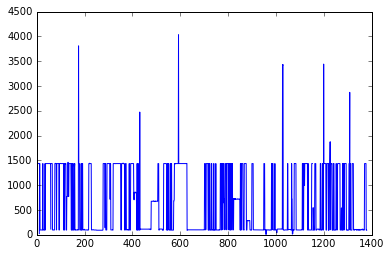

In [15]:
plt.plot(data['period_minutes'])




In [16]:
data['period_minutes'].mean()

643.1505886627888

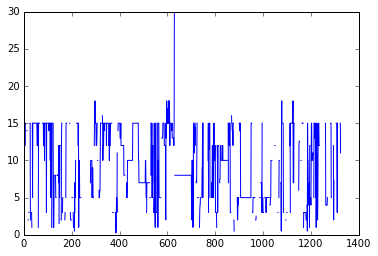

In [17]:
plt.plot(data['expected_lifetime_years'])



In [18]:
data['expected_lifetime_years'].mean()

9.530115424973769

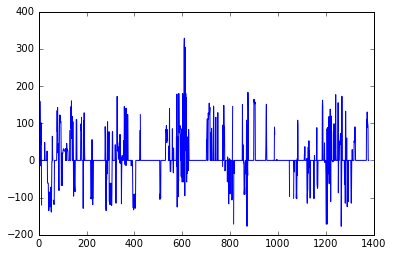

In [19]:
plt.plot(data['longitude'])



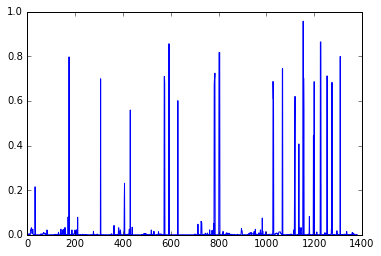

In [20]:
plt.plot(data['eccentricity'])



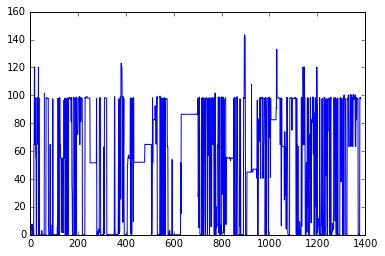

In [21]:
#plt.plot(data['power'])
plt.plot(data['inclination'])


In [22]:
data['inclination'].mean()

50.00025436046514

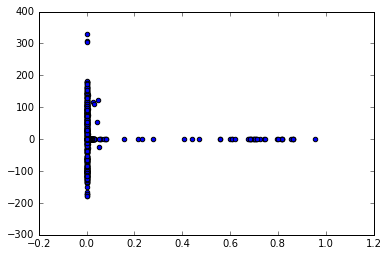

In [23]:
plt.scatter(data['eccentricity'], data['longitude'])



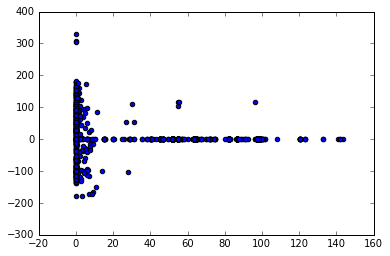

In [24]:
plt.scatter(data['inclination'], data['longitude'])

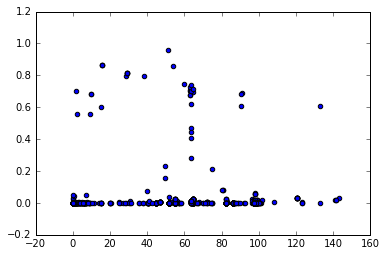

In [25]:
plt.scatter(data['inclination'], data['eccentricity'])

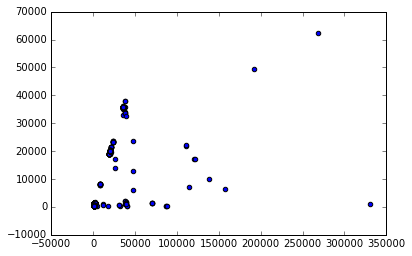

In [26]:
plt.scatter(data['apogee_km'], data['perigee_km'])

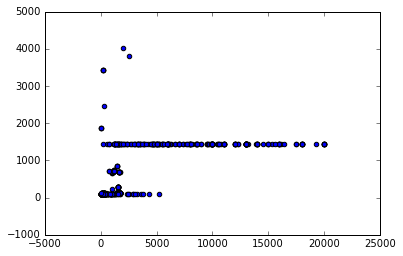

In [27]:
plt.scatter(data['power_watts'], data['period_minutes'])

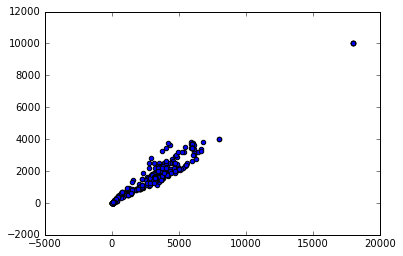

In [28]:
plt.scatter(data['launch_mass'], data['dry_mass'])

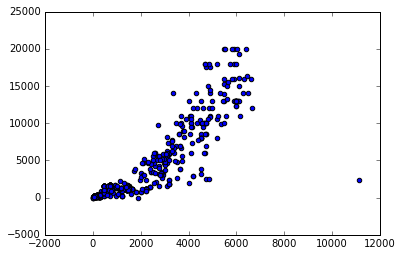

In [29]:
plt.scatter(data['launch_mass'], data['power_watts'])

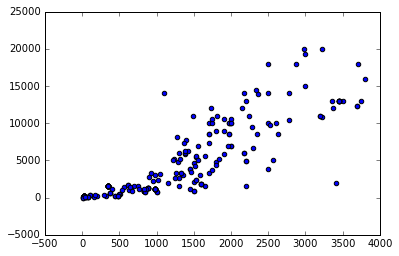

In [30]:
plt.scatter(data['dry_mass'], data['power_watts'])

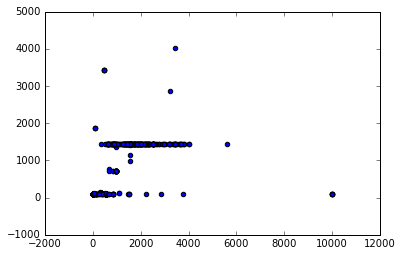

In [31]:
plt.scatter(data['dry_mass'], data['period_minutes'])

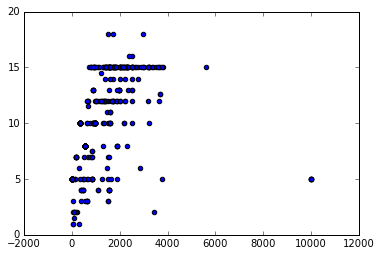

In [32]:
plt.scatter(data['dry_mass'], data['expected_lifetime_years'])

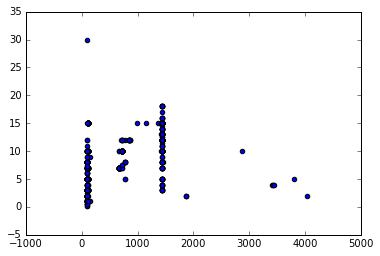

In [33]:
plt.scatter(data['period_minutes'], data['expected_lifetime_years'])

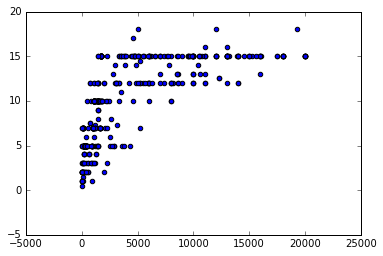

In [34]:
plt.scatter(data['power_watts'], data['expected_lifetime_years'])

In [35]:
data.to_csv('CSatellites.csv')

In [36]:
pd.unique(data['CLO'])

array(['LEO', 'GEO', 'MEO', 'Elliptical'], dtype=object)

In [37]:
data['CLO'].value_counts()

LEO           759
GEO           493
MEO            92
Elliptical     37
Name: CLO, dtype: int64

In [185]:
LEO = data[data.CLO.isin(["LEO"])]
GEO = data[data.CLO.isin(["GEO"])]
MEO_Elliptical = data[data.CLO.isin(["MEO", "Elliptical"])]



/Users/ianssmith/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
/Users/ianssmith/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app
/Users/ianssmith/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


7.0099999999999998

150.40000000000001

In [175]:
min(pd.unique(GEO.inclination))
max(pd.unique(GEO.inclination))
# pd.unique(GEO.longitude)
GEO.inclination.value_counts()

0.01     61
0.02     51
0.03     45
0.05     37
0.00     32
0.04     32
0.07     29
0.06     29
0.08     15
0.10     14
0.09     11
0.12      5
0.13      4
0.11      3
0.14      2
0.19      2
0.53      2
6.45      2
0.20      2
0.18      2
7.33      2
0.30      2
7.00      2
0.46      2
3.01      1
7.03      1
10.60     1
96.40     1
6.06      1
5.10      1
3.45      1
1.97      1
4.00      1
55.23     1
0.29      1
3.00      1
9.43      1
0.27      1
2.04      1
4.08      1
1.19      1
0.42      1
1.09      1
3.79      1
3.10      1
0.50      1
2.99      1
3.34      1
30.04     1
11.53     1
27.10     1
1.83      1
0.45      1
2.16      1
4.02      1
40.00     1
14.30     1
4.96      1
5.24      1
0.82      1
1.01      1
54.90     1
6.99      1
0.21      1
1.00      1
9.40      1
0.90      1
2.34      1
8.27      1
8.74      1
2.33      1
55.00     1
4.50      1
0.17      1
2.54      1
7.72      1
0.35      1
4.11      1
1.84      1
4.91      1
55.09     1
0.22      1
1.15      1
4.92

In [157]:
LEO

,name,country_reg,country,owner,users,purpose,description,CLO,TOO,longitude,perigee_km,apogee_km,eccentricity,inclination,period_minutes,launch_mass,dry_mass,power_watts,launch_date,expected_lifetime_years,contractor,contractor_country,launch_site,launch_vehicle,COSPAR,NORAD,comments
14,Aeneas,USA,USA,Department of Homeland Security,Government,Technology Development,NaN,LEO,Equatorial,0,480,790,0.022100,0.02,97.40,3,NaN,NaN,9/13/2012,NaN,University of Southern California,USA,Vandenberg AFB,Atlas 5,2012-048C,38760,Demonsration program to track cargo containers...
113,Astrosat,NR (12/15),India,Telemetry Tracking and Command Network (ISTRAC...,Government,Space Science,NaN,LEO,Equatorial,0,632,649,0.001210,5.99,97.54,230,NaN,NaN,9/28/2015,5.00,Indian Space Research Organization (ISRO),India,Satish Dhawan Space Centre,PSLV C-30,2015-052A,40930,India's first space observatory.
878,NuSTAR (Nuclear Spectroscopic Telescope Array),USA,USA,National Aeronautics and Space Administration ...,Government,Space Science,NaN,LEO,Equatorial,0,613,632,0.001360,6.00,97.20,360,NaN,NaN,6/13/2012,2.00,Orbital Sciences Corp.,USA,Kwajalein Island,Pegasus XL,2012-031A,38358,First focusing telescopes to image the sky in ...
757,Lemur-2 Joel (Lemur-2 F1),NR (12/15),USA,Spire Global Inc.,Commercial,Earth Observation,Meteorology Automatic Identification System (AIS),LEO,Equatorial,0,629,649,0.001430,6.00,97.49,10,NaN,NaN,9/28/2015,NaN,Spire Global,USA,Satish Dhawan Space Center,PSLV C-30,2015-052D,40933,Start of a 100-satellite constellation for ful...
354,exactView 9,NR (12/15),Canada,exactEarth,Commercial,Communications,Automatic Identification System (AIS),LEO,Equatorial,0,630,649,0.001360,6.00,97.50,6,6,NaN,9/28/2015,NaN,Space Flight Laboratory (SFL),Canada,Satish Dhawan Space Centre,PSLV C-30,2015-052C,40932,Continuation of constellation.
755,Lemur-2 Chris (Lemur-2 F4),NR (12/15),USA,Spire Global Inc.,Commercial,Earth Observation,Meteorology Automatic Identification System (AIS),LEO,Equatorial,0,635,649,0.000998,6.00,97.57,10,NaN,NaN,9/28/2015,NaN,Spire Global,USA,Satish Dhawan Space Center,PSLV C-30,2015-052G,40936,NaN
750,LAPAN A2,NR (12/15),Indonesia,Indonesian National Aeronautics and Space Age...,Government,Earth Observation,Earth Science,LEO,Equatorial,0,631,650,0.001360,6.00,97.53,68,NaN,32.00,9/24/2015,NaN,LAPAN,Indonesia,Satish Dhawan Space Center,PSLV C-30,2015-052B,40931,Disaster mitigation monitoring by Earth observ...
756,Lemur-2 Jeroen (Lemur-2 F3),NR (12/15),USA,Spire Global Inc.,Commercial,Earth Observation,Meteorology Automatic Identification System (AIS),LEO,Equatorial,0,635,649,0.000998,6.01,97.57,10,NaN,NaN,9/28/2015,NaN,Spire Global,USA,Satish Dhawan Space Center,PSLV C-30,2015-052F,40935,NaN
758,Lemur-2 Peter (Lemur-2 F2),NR (12/15),USA,Spire Global Inc.,Commercial,Earth Observation,Meteorology Automatic Identification System (AIS),LEO,Equatorial,0,634,650,0.001140,6.01,97.56,10,NaN,NaN,9/28/2015,NaN,Spire Global,USA,Satish Dhawan Space Center,PSLV C-30,2015-052E,40934,NaN
1174,Strela 3 (Cosmos 2390),Russia,Russia,Ministry of Defense,Military,Communications,NaN,LEO,Equatorial,0,1468,1506,0.002420,8.50,115.70,225,NaN,NaN,7/8/2002,3.00,NPO/PM - Scientific Research Institute for Pre...,Russia,Plesetsk Cosmodrome,Kosmos 3M,2002-036A,27464,Store-dump communications for Russian governme...


In [ ]:
GEO

In [171]:
MEO_Elliptical

,name,country_reg,country,owner,users,purpose,description,CLO,TOO,longitude,perigee_km,apogee_km,eccentricity,inclination,period_minutes,launch_mass,dry_mass,power_watts,launch_date,expected_lifetime_years,contractor,contractor_country,launch_site,launch_vehicle,COSPAR,NORAD,comments
883,O3b FM05 (Other 3 Billion),United Kingdom,United Kingdom,O3b Networks Ltd.,Commercial,Communications,NaN,MEO,Equatorial,0,8064,8068,0.000139,0.03,287.94,700,NaN,1500,6/25/2013,NaN,Thales Alenia Space,France,Guiana Space Center,Soyuz-ST,2013-031A,39188,First of a new constellation in MEO. Provide l...
880,O3b FM02,United Kingdom,United Kingdom,O3b Networks Ltd.,Commercial,Communications,NaN,MEO,Equatorial,0,8063,8069,0.000208,0.03,287.93,700,NaN,1500,6/25/2013,NaN,Thales Alenia Space,France,Guiana Space Center,Soyuz-ST,2013-031C,39190,First of a new constellation in MEO. Provide l...
891,O3b PFM,United Kingdom,United Kingdom,O3b Networks Ltd.,Commercial,Communications,NaN,MEO,Equatorial,0,8063,8069,0.000208,0.03,287.93,700,NaN,1500,6/25/2013,NaN,Thales Alenia Space,France,Guiana Space Center,Soyuz-ST,2013-031D,39191,First of a new constellation in MEO. Provide l...
887,O3B FM09,United Kingdom,United Kingdom,O3b Networks Ltd.,Commercial,Communications,NaN,MEO,Equatorial,0,8063,8068,0.000173,0.04,287.93,650,NaN,1500,12/18/2014,NaN,Thales Alenia Space,France,Guiana Space Center,Soyuz-ST-B,2014-083D,40351,NaN
882,O3b FM04,United Kingdom,United Kingdom,O3b Networks Ltd.,Commercial,Communications,NaN,MEO,Equatorial,0,8062,8069,0.000242,0.04,287.93,700,NaN,1500,6/25/2013,NaN,Thales Alenia Space,France,Guiana Space Center,Soyuz-ST,2013-031B,39189,First of a new constellation in MEO. Provide l...
888,O3B FM10,United Kingdom,United Kingdom,O3b Networks Ltd.,Commercial,Communications,NaN,MEO,Equatorial,0,8063,8069,0.000208,0.04,287.93,650,NaN,1500,12/18/2014,NaN,Thales Alenia Space,France,Guiana Space Center,Soyuz-ST-B,2014-083A,40348,NaN
889,O3B FM11,United Kingdom,United Kingdom,O3b Networks Ltd.,Commercial,Communications,NaN,MEO,Equatorial,0,8063,8069,0.000208,0.04,287.93,650,NaN,1500,12/18/2014,NaN,Thales Alenia Space,France,Guiana Space Center,Soyuz-ST-B,2014-083B,40349,NaN
890,O3B FM12,United Kingdom,United Kingdom,O3b Networks Ltd.,Commercial,Communications,NaN,MEO,Equatorial,0,8063,8069,0.000208,0.04,287.93,650,NaN,1500,12/18/2014,NaN,Thales Alenia Space,France,Guiana Space Center,Soyuz-ST-B,2014-083C,40350,NaN
881,O3b FM03,United Kingdom,United Kingdom,O3b Networks Ltd.,Commercial,Communications,NaN,MEO,Equatorial,0,8060,8071,0.000381,0.09,287.92,650,NaN,1500,7/10/2014,NaN,Thales Alenia Space,France,Guiana Space Center,Soyuz-ST-B,2014-038A,40079,NaN
886,O3B FM08,United Kingdom,United Kingdom,O3b Networks Ltd.,Commercial,Communications,NaN,MEO,Equatorial,0,7815,7842,0.000951,0.12,280.87,650,NaN,1500,7/10/2014,NaN,Thales Alenia Space,France,Guiana Space Center,Soyuz-ST-B,2014-038D,40082,NaN


In [120]:
Elliptical

,name,country_reg,country,owner,users,purpose,description,CLO,TOO,longitude,perigee_km,apogee_km,eccentricity,inclination,period_minutes,launch_mass,dry_mass,power_watts,launch_date,expected_lifetime_years,contractor,contractor_country,launch_site,launch_vehicle,COSPAR,NORAD,comments
1156,SPIRALE-A (Système Préparatoire Infra-Rouge po...,France,France,Ministry of Defense/General Delegation for Ord...,Military,Technology Development,Infrared Imaging,Elliptical,NaN,0,240,31342,0.7020,2.00,547.00,117,NaN,NaN,2/11/2009,NaN,EADS Astrium,France,Guiana Space Center,Ariane 5 ECA,2009-008C,33751,Demonstration program designed to collect infr...
1157,SPIRALE-B (Système Préparatoire Infra-Rouge po...,France,France,Ministry of Defense/General Delegation for Ord...,Military,Technology Development,Infrared Imaging,Elliptical,NaN,0,389,17480,0.5580,2.10,314.00,117,NaN,NaN,2/11/2009,NaN,EADS Astrium,France,Guiana Space Center,Ariane 5 ECA,2009-008D,33752,Demonstration program designed to collect infr...
431,Geotail (Geomagnetic Tail Laboratory),Japan,Multinational,Institute of Space and Astronautical Science (...,Government,Space Science,NaN,Elliptical,Deep Highly Eccentric,0,49551,191451,0.5590,9.39,2474.83,980,NaN,273,7/24/1992,NaN,NASA/Goddard Space Flight Center,USA,Cape Canaveral,Delta 2,1992-044A,22049,Study the dynamics of the Earth's magnetotail ...
1274,Van Allen Probe A (RBSP-A Radiation Belt Storm...,USA,USA,NASA/Johns Hopkins University Applied Physics ...,Government,Earth Observation,Earth Science,Elliptical,NaN,0,591,30534,0.6830,10.03,539.06,648,NaN,NaN,8/30/2012,NaN,Johns Hopkins University Applied Physics Labor...,USA,Cape Canaveral,Atlas 5,2012-046A,38752,Study the Earth's radiation belts on various s...
1275,Van Allen Probe B (RBSP-B Radiation Belt Storm...,USA,USA,NASA/Johns Hopkins University Applied Physics ...,Government,Earth Observation,Earth Science,Elliptical,NaN,0,595,30657,0.6830,10.04,541.40,666,NaN,NaN,8/30/2012,NaN,Johns Hopkins University Applied Physics Labor...,USA,Cape Canaveral,Atlas 5,2012-046B,38753,Study the Earth's radiation belts on various s...
630,Interstellar Boundary EXplorer (IBEX),USA,USA,NASA/Goddard Space Flight Center,Government,Space Science,NaN,Elliptical,Deep Highly Eccentric,0,62200,268679,0.6010,15.20,NaN,462,NaN,NaN,10/19/2008,NaN,Orbital Sciences Corp.,USA,Kwajalein Island,Pegasus XL,2008-051A,33401,Monitor the boundary between heliosphere and i...
1227,THEMIS D (Time History of Events and Macroscal...,USA,Multinational,NASA/University of California Berkeley (in par...,Government/Civil,Space Science,NaN,Elliptical,NaN,0,467,87260,0.8640,15.70,1867.91,126,77,40,2/17/2007,2,Swales Aerospace,USA,Cape Canaveral,Delta 2,2007-004D,30797,Five phase mission to study earth's auroras; m...
1226,THEMIS A (Time History of Events and Macroscal...,USA,Multinational,NASA/University of California Berkeley (in par...,Government/Civil,Space Science,NaN,Elliptical,NaN,0,461,87304,0.8640,15.70,1868.98,126,77,40,2/17/2007,2,Swales Aerospace,USA,Cape Canaveral,Delta 2,2007-004A,30580,Five phase mission to study earth's auroras; m...
1228,THEMIS E (Time History of Events and Macroscal...,USA,Multinational,NASA/University of California Berkeley (in par...,Government/Civil,Space Science,NaN,Elliptical,NaN,0,474,87526,0.8640,15.70,1875.53,126,77,40,2/17/2007,2,Swales Aerospace,USA,Cape Canaveral,Delta 2,2007-004E,30798,Five phase mission to study earth's auroras; m...
175,Chandra X-Ray Observatory (CXO),USA,USA,NASA Goddard Space Flight Center,Government,Space Science,NaN,Elliptical,Deep Highly Eccentric,0,9999,138825,0.7970,28.50,3808.92,4742,NaN,2500,7/23/1999,5,TRW Space and Electronics,USA,Cape Canaveral,Space Shuttle (STS 93),1999-040B,25867,X-ray astronomy.


In [ ]:
pd.unique(data['TOO'])

In [194]:
data['TOO'].value_counts()

Sun-Synchronous          345
Non-Polar Inclined       310
Polar                    156
Equatorial                28
Molniya                   15
Elliptical                11
Deep Highly Eccentric      9
Cislunar                   1
Name: TOO, dtype: int64

In [ ]:
power = data['power_watts'].value_counts()
power.plot(kind='barh', rot=0)

In [ ]:
data['CLO'(sort=True)

In [ ]:
#pd.unique(data['longitude'])
data.expected_lifetime_years.value_counts().plot(kind='barh', rot=0)

In [ ]:
#pd.unique(data['inclination'])
#data['inclination'].value_counts(sort=True)


In [ ]:

#data['inclination'].max()
max(data.apogee_km)

In [ ]:
max(data.perigee_km)

In [ ]:
min(data.apogee_km)

In [ ]:
min(data.perigee_km)

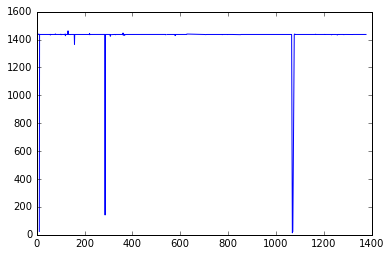

In [186]:
plt.plot(GEO.period_minutes)

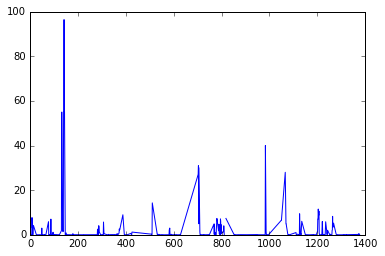

In [190]:
plt.plot(GEO.inclination)

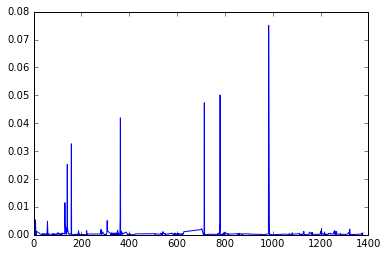

In [189]:
plt.plot(GEO.eccentricity)

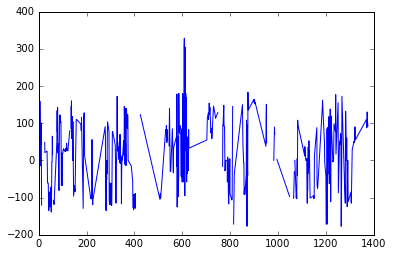

In [188]:
plt.plot(GEO.longitude)

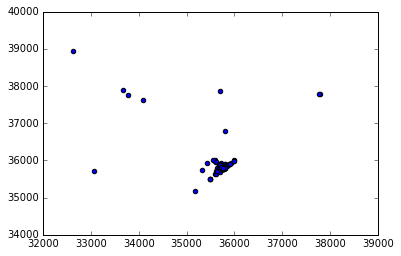

In [177]:
plt.scatter(GEO.perigee_km, GEO.apogee_km)

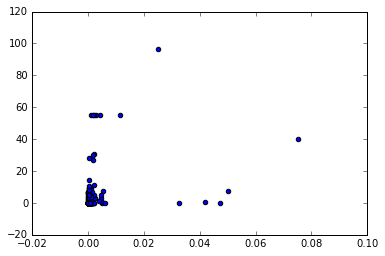

In [192]:
plt.scatter(GEO.eccentricity, GEO.inclination)

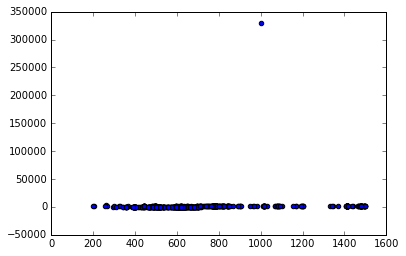

In [193]:
plt.scatter(LEO.perigee_km, LEO.apogee_km)

In [ ]:
plt.scatter(GEO.eccentricity, GEO.inclination)

In [ ]:
plt.scatter(GEO.)

In [ ]:
plt.scatter(GEO.)

In [ ]:
plt.scatter(GEO.)

In [ ]:
plt.scatter(GEO.)

In [ ]:
plt.scatter(GEO.)

In [ ]:
plt.scatter(GEO.)